# Portfolio assignment 6
Perform a univariate analysis on a dataset you have chosen. Make sure that you can perform a univariate analysis on at least 2 
columns with categorical data and on at least 2 columns with numerical data in the dataset. 

I am going to analyse the following dataset: 'HR Analytics: Job change of Data Scientists'. The subtitle of the dataset is: 'Predict who will move to a new job', that makes me curious so let's begin with analyzing! 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('Datasets/aug_test.csv', sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,8.270.000.000.000.000,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,8.270.000.000.000.000,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


### Selecting columns
I am going to make a selection of the columns that I want to use.

In [79]:
columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'experience', 'training_hours']
df = df[columns]
df.head()

,gender,relevent_experience,enrolled_university,education_level,experience,training_hours
0,Male,Has relevent experience,Full time course,Graduate,9,21
1,Female,Has relevent experience,no_enrollment,Graduate,5,98
2,Male,No relevent experience,no_enrollment,High School,<1,15
3,Male,Has relevent experience,no_enrollment,Masters,11,39
4,Male,Has relevent experience,no_enrollment,Graduate,>20,72


## Univariate analysis on numerical data
First I start by analyzing the numerical data in the dataset.

### Years of experience
The column experience is in years

In [80]:
df['experience'].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

As you can see there two values which are not integers/floats. I am going to fix that first.

In [81]:
# setting <1 to 0
filter1year = df['experience'] == '<1'
df.loc[filter1year, 'experience'] = 0
df['experience'].unique()

array(['9', '5', 0, '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [82]:
# setting >20 to 21
filter20year = df['experience'] == '>20'
df.loc[filter20year, 'experience'] = 21
df['experience'].unique()

array(['9', '5', 0, '11', 21, '10', '14', '3', '20', '8', '4', '13', '2',
       '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [83]:
df['experience'] = pd.to_numeric(df['experience'])
df['experience'].unique()

array([ 9.,  5.,  0., 11., 21., 10., 14.,  3., 20.,  8.,  4., 13.,  2.,
        6.,  7.,  1., 19., 15., 16., nan, 17., 18., 12.])

#### Analyzing
Now that all the values has been turned into numbers, we can start analyzing the years of experience of the data scientists.

In [84]:
column_ex = 'experience'
df[column_ex].min()

0.0

In [85]:
df[column_ex].max()

21.0

In [86]:
df[column_ex].mean()

10.104990583804144

In [87]:
df[column_ex].median()

9.0

We can conclude that the minimum experience is less than 1 year en the maximum experience more than 20 years. The average experience is 10 years.

#### Plots and diagrams
Let's chart those numbers.

<AxesSubplot:ylabel='Frequency'>

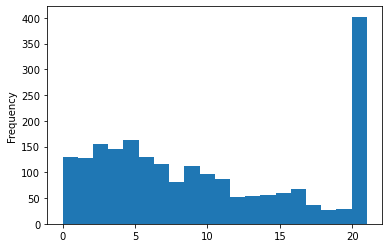

In [88]:
df[column_ex].plot(kind='hist', bins=20)

<AxesSubplot:>

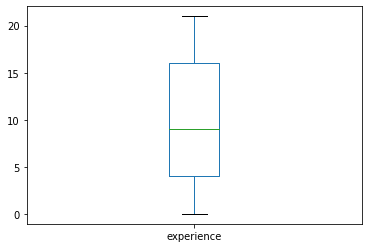

In [89]:
df[column_ex].plot(kind='box')

### Hours of training
We are going to analyse the column training_hours

In [90]:
column_th = 'training_hours'
df[column_th].min()

1

In [91]:
df[column_th].max()

334

In [92]:
df[column_th].mean()

64.98309065288868

So the minimum hours of training is 1 and the maximum hours of training that a participated data scientist has had is 334 hours. The average hours is 65. Let's see all the unique values we have.

In [93]:
df[column_th].unique()

array([ 21,  98,  15,  39,  72,  12,  11,  81,   2,   4, 196,  51,  48,
       134,  10, 125,  31,  23, 110,  74,  44,  33,  19,  65,  46,  78,
       105,  29,  43,  18,   8, 145,  22,   9,  20, 130,   3,  49, 270,
        35,  87,  37, 158, 114,  40,  91,  14, 132, 124,  80, 188, 182,
       282,  84,  59, 116,  34,  64,  77,  56,  73,  30,  66, 100,  32,
        28,  99,  41, 258, 144, 328,  47,  36,  55,   5,  58,   7,  42,
        95,  17,  54,  50, 135,  27,  24, 120,  61, 139, 154,  96,  76,
       156, 102,  88,  13, 101, 178, 200,  68,  70,  16, 152, 138, 128,
       204,  53,  52,  67, 118, 272,  26, 174,  71, 202,  60,  82, 194,
       248, 119,  85,  86,  38, 212,  57, 107, 103, 109, 150,  25,  62,
        89, 112, 167,  45, 106,  92, 163, 108,  90,  83, 322, 166, 148,
       168, 104, 234, 127,  75, 113, 332, 288, 170,  63, 220, 250, 222,
       136, 160, 226, 141,  94, 190, 206, 266, 334, 304, 172, 284, 180,
         6, 122, 214, 111, 292,  97, 184, 218, 176, 129,  79,  6

As you can see the numbers are quite different. Let's chart the values.

<AxesSubplot:ylabel='Frequency'>

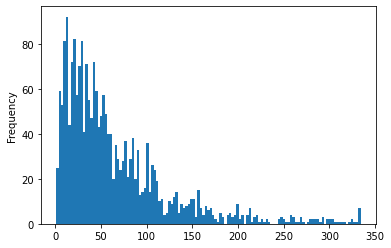

In [94]:
df[column_th].plot(kind='hist', bins=125)

## Univariate analysis on categorical data
Now we are going to analyse the categorical data in the dataset.

### Gender

<AxesSubplot:>

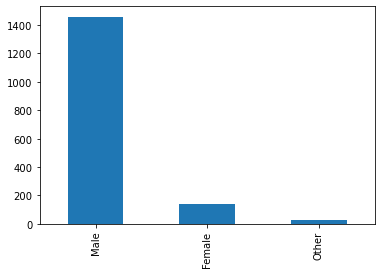

In [95]:
df['gender'].value_counts().plot(kind='bar')

As you can see there is a huge difference between the genders of the participants.

### Relevent experience

<AxesSubplot:>

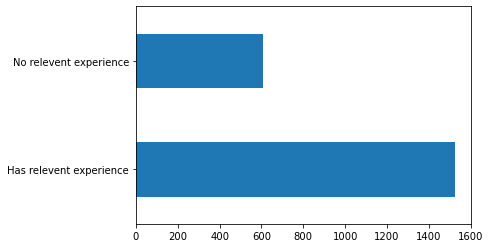

In [97]:
df['relevent_experience'].value_counts().plot(kind='barh')

### Level of education
Now we are going to look at the education_level column

<AxesSubplot:>

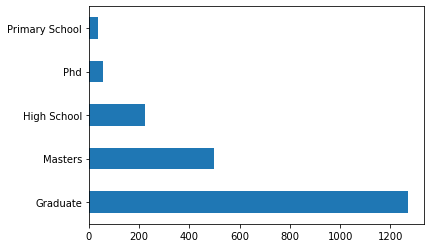

In [99]:
df['education_level'].value_counts().plot(kind='barh')